### Library import

### Library importing for Lenear Algebra and Data Processing

In [1]:
import numpy as np
import pandas as pd

### Data Visualization

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import datetime

from matplotlib.ticker import FuncFormatter

import warnings
import math as ma
warnings.filterwarnings("ignore")
%matplotlib inline

### Libraries for Algorithm

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



### Get Data

In [4]:
customerdemographic= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic")
transactions= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions")
customeraddress= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress")
newcustomerlist= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="NewCustomerList")


In [5]:
customerdemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,66.898356,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.701096,Administrative Officer,Femaleinancial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.624383,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.917534,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.298356,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [7]:
customeraddress.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NSW,NSW,NSW
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,VIC,VIC,NSW
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,QLD,QLD,QLD
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,New South Wales,NSW,NSW


###  Exploring Data Analysis(EDA)

In [8]:
customerdemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   Age                                  3912 non-null   float64       
 7   job_title                            3494 non-null   object        
 8   job_industry_category                3344 non-null   object        
 9   wealth_segment                       4000 non-null   object        
 10  deceased_ind

In [9]:
customerdemographic.describe()

,customer_id,past_3_years_bike_related_purchases,Age,tenure
count,4000.000000,4000.000000,3912.000000,3913.000000
mean,2000.500000,48.890000,43.097075,10.657041
std,1154.844867,28.715005,12.626149,5.660146
min,1.000000,0.000000,18.454520,1.000000
25%,1000.750000,24.000000,33.494931,6.000000
50%,2000.500000,48.000000,43.098356,11.000000
75%,3000.250000,73.000000,52.602466,15.000000
max,4000.000000,99.000000,88.884657,22.000000


### Renaming Column Headers

In [10]:
list(customerdemographic)

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure']

In [11]:
customerdemographic=customerdemographic.rename(columns={'first_name':'f_name','last_name':'l_name','past_3_years_bike_related_purchases':'past_bike_purchases','owns_car':'car_owner','job_industry_category':'job_idustry'})

In [12]:
list(customerdemographic)

['customer_id',
 'f_name',
 'l_name',
 'gender',
 'past_bike_purchases',
 'DOB',
 'Age',
 'job_title',
 'job_idustry',
 'wealth_segment',
 'deceased_indicator',
 'car_owner',
 'tenure']

In [13]:
customerdemographic.head()

,customer_id,f_name,l_name,gender,past_bike_purchases,DOB,Age,job_title,job_idustry,wealth_segment,deceased_indicator,car_owner,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,66.898356,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.701096,Administrative Officer,Femaleinancial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.624383,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.917534,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.298356,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [14]:
customerdemographic=customerdemographic.iloc[1: ]
customerdemographic

,customer_id,f_name,l_name,gender,past_bike_purchases,DOB,Age,job_title,job_idustry,wealth_segment,deceased_indicator,car_owner,tenure
1,2,Eli,Bockman,Male,81,1980-12-16,39.701096,Administrative Officer,Femaleinancial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.624383,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.917534,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.298356,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,53.961370,NaN,Retail,High Net Worth,N,Yes,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,45.060000,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,19.114794,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,Unsigned,60,NaT,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,46.851781,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


### Missing Value Find

In [15]:
total= customerdemographic.isnull().sum().sort_values(ascending=False)
percentage_1=customerdemographic.isnull().sum()/customerdemographic.isnull().count()*100
percentage_2=(round(percentage_1, 1).sort_values(ascending=False))
missing_data=pd.concat([total, percentage_2], axis=1, keys=['total', "%"])
missing_data.head(5)


,total,%
job_idustry,656,16.4
job_title,506,12.7
l_name,125,3.1
Age,88,2.2
tenure,87,2.2


In [16]:
customerdemographic.head(10)

,customer_id,f_name,l_name,gender,past_bike_purchases,DOB,Age,job_title,job_idustry,wealth_segment,deceased_indicator,car_owner,tenure
1,2,Eli,Bockman,Male,81,1980-12-16,39.701096,Administrative Officer,Femaleinancial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.624383,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.917534,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.298356,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,53.961370,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,44.517534,NaN,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,58.429863,Media Manager I,NaN,Mass Customer,N,No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,47.476438,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,31.876438,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,66.350411,NaN,Property,Mass Customer,N,No,9.0


### Array to fill null values with

In [17]:
def check_NAN():
    ret = []
    temp = list(customerdemographic)
    for each in temp:
        ret.append(customerdemographic[each].isna().sum())
    return ret

NaN_list = check_NAN()
print(NaN_list, len(NaN_list))

# Now checking Columns

check = []
k     = -1
for i in NaN_list:
    k += 1
    if i > 0:
        check.append(k)
        
# Now checking Unique

def check_unique():
    temp = list(customerdemographic)
    dict = {}
    for i in range(3, 13):
        ct = 0
        if NaN_list[i] > 0:
            ct = len(customerdemographic[temp[i]].unique()) - 1
        else:
            ct = len(customerdemographic[temp[i]].unique())
        dict[temp[i]] = (ct, customerdemographic[temp[i]].unique())
    return dict

[0, 0, 125, 0, 0, 87, 88, 506, 656, 0, 0, 0, 87] 13


### Now to compare Gender Vs. Bike bought

In [18]:
# 1. F - Female, 2. M- Male, 3. U-Unknown in array

gender = [0,0,0] 
for each in customerdemographic['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)

def gender_female(x, pos):
    
    return int(x)

bike_list = [0,0,0]
bike_list[0] += customerdemographic['past_3_years_bike_related_purchases'][customerdemographic['gender']== 'Female'].sum() + customerdemographic['past_3_years_bike_related_purchases'][customerdemographic['gender']== 'F'].sum()
bike_list[1] += customerdemographic['past_3_years_bike_related_purchases'][customerdemographic['gender']== 'Male'].sum() + customerdemographic['past_3_years_bike_related_purchases'][customerdemographic['gender']== 'M'].sum()
bike_list[2] += customerdemographic['past_3_years_bike_related_purchases'][customerdemographic['gender']== 'U'].sum()

grapho = [gender[0], bike_list[0], gender[1], bike_list[1], gender[2], bike_list[2]]
graphl = [gender[0]*10,bike_list[0], gender[1]*10, bike_list[1], gender[2]*10, bike_list[2]]
colorr = (0.3,0.1,0.4,0.6)



[2038, 1873, 88]


KeyError: 'past_3_years_bike_related_purchases'

### The 'transaction_date' and 'product_first_sold_date' change to date

In [19]:
#convert date columns from integer to datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], unit='s')
transactions['transaction_date'].head()

#convert date columns from integer to datetime
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'])
transactions['product_first_sold_date'].head()

0   2012-12-02
1   2014-03-03
2   1999-07-20
3   1998-12-16
4   2015-08-10
Name: product_first_sold_date, dtype: datetime64[ns]

In [20]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [21]:
total= transactions.isnull().sum().sort_values(ascending=False)
percentage_1=transactions.isnull().sum()/transactions.isnull().count()*100
percentage_2=(round(percentage_1, 1).sort_values(ascending=False))
missing_data=pd.concat([total, percentage_2], axis=1, keys=['total', "%"])
missing_data.head(5)


,total,%
profit,15791,79.0
online_order,360,1.8
product_first_sold_date,197,1.0
standard_cost,197,1.0
product_size,197,1.0


In [22]:
# Duplicate Values

dups = transactions.duplicated()
transactions[dups].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
profit                     0.0
dtype: float64

### Create RFM Features for each customers

In [23]:
df_RFM = transactions.groupby('customer_id').agg({'transaction_date': lambda y: (transactions['transaction_date'].max().date() - y.max().date()).days,
                                        'customer_id': lambda y: len(y.unique()),  
                                        'list_price': lambda y: round(y.sum(),2)})
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head(10)

,Recency,Frequency,Monetary
customer_id,,,
2183,8,1,19071.32
1129,26,1,18349.27
1597,25,1,18052.68
941,33,1,17898.46
2788,44,1,17258.94
936,32,1,17160.24
1887,43,1,17133.93
1302,29,1,17035.83
1140,6,1,16199.24


### To automate the segmentation we will use 80% quantile for Recency and Monetary

In [24]:
quantiles = df_RFM.quantile(q=[0.8])
print(quantiles)
df_RFM['R']=np.where(df_RFM['Recency']<=int(quantiles.Recency.values), 2, 1)
df_RFM['F']=np.where(df_RFM['Frequency']>=int(quantiles.Frequency.values), 2, 1)
df_RFM['M']=np.where(df_RFM['Monetary']>=int(quantiles.Monetary.values), 2, 1)
df_RFM.head()

     Recency  Frequency  Monetary
0.8     98.0        1.0   8764.25


,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
2183,8,1,19071.32,2,2,2
1129,26,1,18349.27,2,2,2
1597,25,1,18052.68,2,2,2
941,33,1,17898.46,2,2,2
2788,44,1,17258.94,2,2,2


### Calculate RFM score and sort customers

In [25]:
# To do the 2x2 Matrix we will only use Recency & Monetary
df_RFM['RMScore'] = df_RFM.M.map(str)+df_RFM.R.map(str)
df_RFM = df_RFM.reset_index()
df_RFM_SUM = df_RFM.groupby('RMScore').agg({'customer_id': lambda y: len(y.unique()),
                                        'Frequency': lambda y: round(y.mean(),0),
                                        'Recency': lambda y: round(y.mean(),0),
                                        'R': lambda y: round(y.mean(),0),
                                        'M': lambda y: round(y.mean(),0),
                                        'Monetary': lambda y: round(y.mean(),0)})
df_RFM_SUM = df_RFM_SUM.sort_values('RMScore', ascending=False)
df_RFM_SUM.head()

,customer_id,Frequency,Recency,R,M,Monetary
RMScore,,,,,,
22,653,1,32,2,2,10835.0
21,47,1,123,1,2,10257.0
12,2144,1,39,2,1,5468.0
11,650,1,158,1,1,4423.0


### Visualize the Value Matrix and explore some key numbers

In [26]:
#Average Monetary Matrix

df_RFM_M = df_RFM_SUM.pivot(index='M', columns='R', values='Monetary')
df_RFM_M= df_RFM_M.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
print(df_RFM_M)

R        1        2
M                  
2  10257.0  10835.0
1   4423.0   5468.0


### Number of Customer Matrix

In [27]:
df_RFM_C = df_RFM_SUM.pivot(index='M', columns='R', values='customer_id')
df_RFM_C= df_RFM_C.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
print(df_RFM_C)

R    1     2
M           
2   47   653
1  650  2144


### Recency Matrix

In [28]:
df_RFM_R = df_RFM_SUM.pivot(index='M', columns='R', values='Recency')
df_RFM_R= df_RFM_R.reset_index().sort_values(['M'], ascending = False).set_index(['M'])

df_RFM_R

R,1,2
M,,
2,123,32
1,158,39


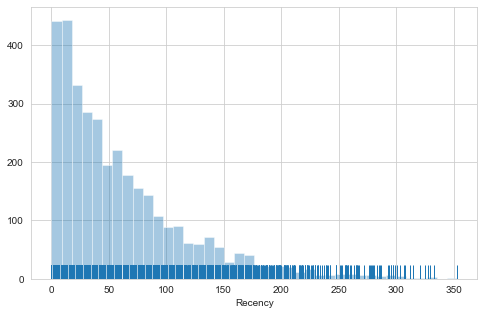

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df_RFM.Recency, kde=False, rug=True)

plt.show()

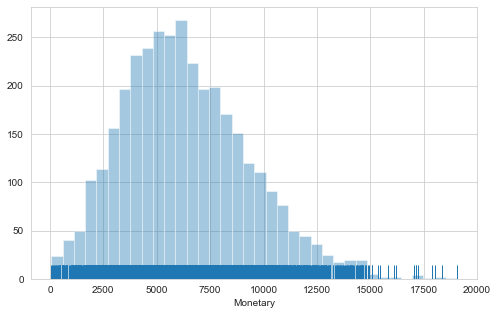

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df_RFM.Monetary, kde=False, rug=True)

plt.show()

### The distribution of segments using the squarify plot :